   # Assignment 5: kaggle.com: Titanic






### 25th February 2018





#### Team Members:
#### Prashant Wankhede (PRW19@pitt.edu)
#### Abhishek Shankarnarayanan (ABS100@pitt.edu)






Question:

1. How did you do to wrangle, prepare, cleanse the data?

2. How did you analyze, identify patterns, and explore the data?

3. Improve prediction from the lab and pick the best to submit to kaggle.com:   
   a. What are the models you ran (you should run at least 5)?
   b. What are the features/variables in the data you chose to build your models?
   c. How and why did you pick the features/variables?
   d. What is the model you picked to submit and its score rated by kaggle.com (it should be higher than 0.75598)?
   e. What is/are the parameter value/values as a result of your parameter tuning?
   f. How did you pick the value(s)?

The challange here is to predict who will survive on the Titanic based on the data provided by kaggle.com.

The prediction is based on the information of passangers provided in the data files provided by kaggle. These includes Name, Passenger Class, Sex, Age, Number of Siblings, Number of Parents and Children, Ticket number, Ticket Fare, Cabin Number and Port of Departure.

The survived set provides the data about who survived and who did not in the form of training set and the same information is not available in the validation set (test set) for which we going to do prediction.The result thus obtained will be hopefully with best accuracy will be submitted to kaggle.com in order to validate the accurancy.



In [1]:
import sys # access to system parameters
print('Python version: {}'.format(sys.version))

import pandas as pd # library of functions for data processing
print('pandas version: {}'.format(pd.__version__))

import matplotlib # functions for visualization
print('matplotlib version: {}'.format(matplotlib.__version__))

import numpy as np # package for scientific computing
print('NumPy version: {}'.format(np.__version__))

import scipy as sp # functions for scientific computing and advanced mathematics
print('SciPy version: {}'.format(sp.__version__))

import IPython.display
from IPython import display # printing fancy in Jupyter notebook
print('IPython version: {}'.format(IPython.__version__))

import sklearn # collection of machine learning algorithms
print('scikit-learn version: {}'.format(sklearn.__version__))

# Some additional nifty functions
import re
import random
import time

import warnings
warnings.filterwarnings('ignore')

# Model algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process, neural_network

# Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

#Configure visualization defaults
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

Python version: 3.6.3 |Anaconda, Inc.| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
pandas version: 0.20.3
matplotlib version: 2.1.0
NumPy version: 1.13.3
SciPy version: 0.19.1
IPython version: 6.1.0
scikit-learn version: 0.19.1


The data in the training set will be used to investigate our data and to train and test our machine learning model.

In [2]:


# Data for visualizations, training and testing
data = pd.read_csv('C:/Users/work/Desktop/DA/train.csv')

# Data for validation
data_val = pd.read_csv('C:/Users/work/Desktop/DA/test.csv')

# For cleaning purposes it is simple to group all dataframes in a list
data_cleaning = [data, data_val]

# For analysis of distributions of some features it is convernient to concatenate the two dataframes
data_conc = pd.concat(data_cleaning)



## Lets see the data sample to visualize

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print('Training data: \n')
print(data.info())
print('\n','-'*25,'\n')
print('Validation data: \n')
print(data_val.info())

Training data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None

 ------------------------- 

Validation data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int

As we can see, some entries are missing which we be fixing later but most of the features are seem to have finite information.

In [5]:
print('Training data with null values: \n',data.isnull().sum())
print('\n','-'*25,'\n')
print('Valudation data (test) with null values: \n',data_val.isnull().sum())

Training data with null values: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 ------------------------- 

Valudation data (test) with null values: 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


The nissing information about the age is shown above. We can get more insight into this by concatenating data training and validation dataframes.

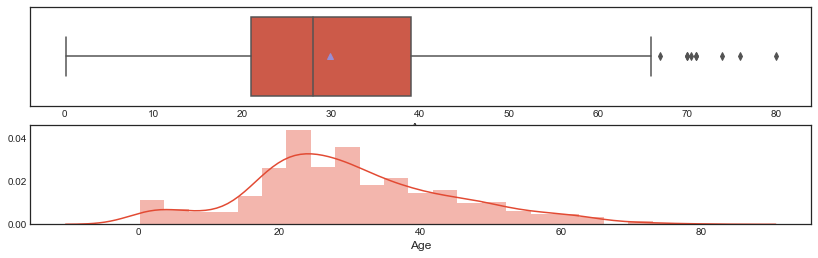

In [6]:

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(14,4))
    
sns.boxplot(data_conc[data_conc['Age'].notnull()]['Age'],showmeans=True, ax = ax1)
sns.distplot(data_conc[data_conc['Age'].notnull()]['Age'], ax = ax2)



From the red box, we can see that the vertical line does not coninside with the blue triangle which makes mean not same as the median for the ages of the passangers.

In the traning data set, the missing entries for the port of departure can be assumed as 'embarked' as most people did.

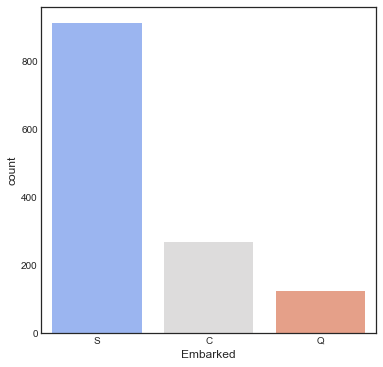

In [7]:


fig, ax = plt.subplots(1,1,figsize = (6,6))

sns.countplot(x='Embarked',data=data_conc,palette = 'coolwarm')



One passanger did not seem to note down his fare in the data

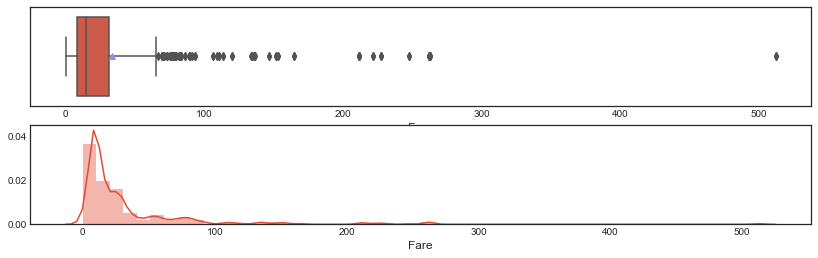

In [8]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(14,4))
    
sns.boxplot(data_conc[data_conc['Fare'].notnull()]['Fare'],showmeans=True, ax = ax1)
sns.distplot(data_conc[data_conc['Fare'].notnull()]['Fare'], ax = ax2)

In this case, the mean and median are far from each other. The missing fare can be fairly assumed to be missing fare value,.


We are filling missing data below.

In [9]:
for df in data_cleaning:
    
    # Complete the missing Age datavalues with the median of the Age
    df['Age'].fillna(data_conc['Age'].median(),inplace=True)
    
    # Complete the missig Embarked with the most common port of departure
    df['Embarked'].fillna(data_conc['Embarked'].mode()[0],inplace=True)
    
    # Complete the missing Fare with the median of the Fare
    df['Fare'].fillna(data_conc['Fare'].median(),inplace=True)

Lets look at the null values in the dataframe.

In [10]:
print('Training data with null values: \n',data.isnull().sum())
print('\n','-'*25,'\n')
print('Valudation data with null values: \n',data_val.isnull().sum())

Training data with null values: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

 ------------------------- 

Valudation data with null values: 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


The dataframes seems to have complete information now. Create new features now and convert them into new features.

In [11]:
print(data_conc['Cabin'].sample(10))

106    NaN
310    NaN
123    NaN
636    NaN
183     F4
247    NaN
368    NaN
233    NaN
546    NaN
241    NaN
Name: Cabin, dtype: object


From the data, majority of passangers did not seem to have room asigned. Lets put them all into additional deck.

In [12]:
for df in data_cleaning:
    df['Deck'] = df[df['Cabin'].notnull()]['Cabin'].astype(str).str[0]
    df['Deck'].fillna('N',inplace=True)

Text(0.5,1,'validation')

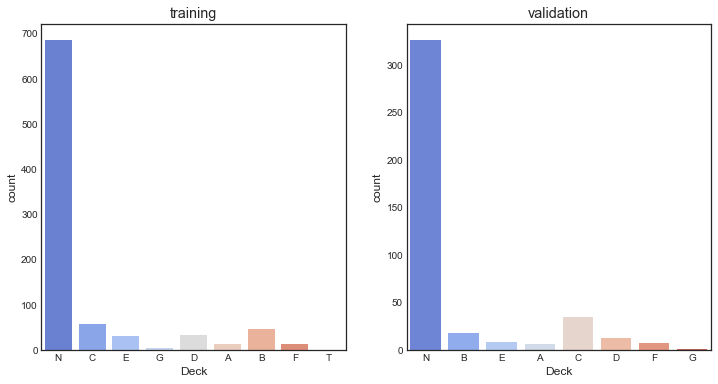

In [13]:
fig, ax = plt.subplots(1,2,figsize = (12,6))

sns.countplot(x='Deck' ,data=data, ax = ax[0],palette = 'coolwarm')
ax[0].set_title('training')
sns.countplot(x='Deck' ,data=data_val, ax = ax[1],palette = 'coolwarm')
ax[1].set_title('validation')

Cabin information seems to surplus which is respnsible for not counting all the information. Lets define a descriptor iscabin if they have it or not.

In [14]:
for df in data_cleaning:
    df['NoCabin'] = df['Deck'] == 'N'
    df['NoCabin'] = (df['NoCabin'] == True).astype(int)

Text(0.5,1,'validation')

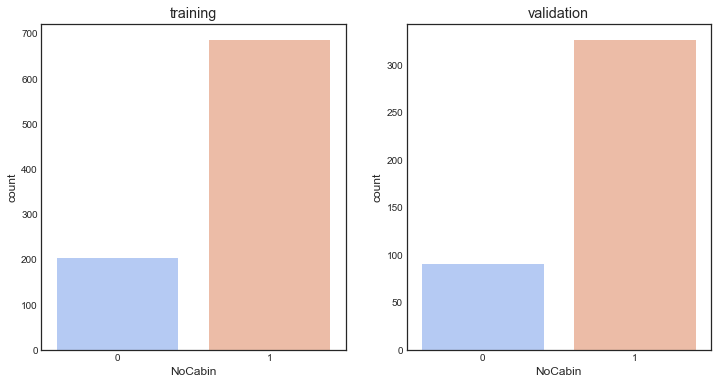

In [15]:
fig, ax = plt.subplots(1,2,figsize = (12,6))

sns.countplot(x='NoCabin', data=data, ax = ax[0],palette = 'coolwarm')
ax[0].set_title('training')
sns.countplot(x='NoCabin' ,data=data_val, ax = ax[1],palette = 'coolwarm')
ax[1].set_title('validation')

Let us get more insight into family sizes with siblings, childrens/parents.

In [16]:
for df in data_cleaning:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

Text(0.5,1,'validation')

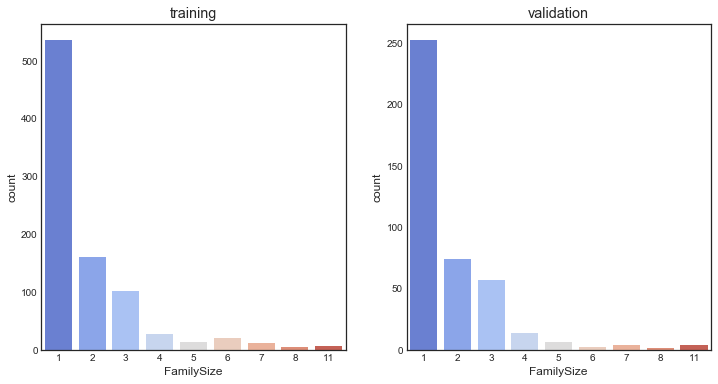

In [17]:
fig, ax = plt.subplots(1,2,figsize = (12,6))

sns.countplot(x='FamilySize' ,data=data, ax = ax[0],palette = 'coolwarm')
ax[0].set_title('training')
sns.countplot(x='FamilySize' ,data=data_val, ax = ax[1],palette = 'coolwarm')
ax[1].set_title('validation')

Lets find out more information from the names.

In [18]:
data_conc['Name'].sample(10)

154             Asplund, Master. Filip Oscar
34                   Meyer, Mr. Edgar Joseph
461                      Morley, Mr. William
160                       Smyth, Miss. Julia
284               Smith, Mr. Richard William
374    Dodge, Mrs. Washington (Ruth Vidaver)
221                   Reynolds, Mr. Harold J
126                 Brobeck, Mr. Karl Rudolf
135                Carlsson, Mr. Carl Robert
455                       Jalsevac, Mr. Ivan
Name: Name, dtype: object

The title is located after comma which can be grouped in the following way.

In [19]:
title_names = data_conc['Name'].str.split(", ",expand=True)[1].str.split(".",expand=True)[0].value_counts()
print(title_names)
title_names_mask = title_names < 10

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Ms                2
Mlle              2
Capt              1
Don               1
Sir               1
Lady              1
Jonkheer          1
Dona              1
Mme               1
the Countess      1
Name: 0, dtype: int64


In [20]:
for df in data_cleaning:
    df['Title'] = df['Name'].str.split(", ",expand=True)[1].str.split(".",expand=True)[0]
    df['Title'] = df['Title'].apply(lambda x: 'Misc' if title_names_mask.loc[x] == True else x)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Deck           891 non-null object
NoCabin        891 non-null int32
FamilySize     891 non-null int64
Title          891 non-null object
dtypes: float64(2), int32(1), int64(6), object(7)
memory usage: 108.0+ KB


For more mathematical processing, lets encode object data into integers values with elimination of rest of the values.

In [22]:
#drop_column = ['PassengerId','Cabin','Ticket','Name', 'Cabin']
for df in data_cleaning:
    df['Sex_code'] = LabelEncoder().fit_transform(df['Sex'])
    df['Title_code'] = LabelEncoder().fit_transform(df['Title'])
    df['Embarked_code'] = LabelEncoder().fit_transform(df['Embarked'])
    df['Deck_code'] = LabelEncoder().fit_transform(df['Deck'])
    #try:
    #    df.drop(drop_column,axis=1,inplace=True)
    #    break
    #except ValueError:
    #    print('You probably already dropped these tables')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
PassengerId      891 non-null int64
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Ticket           891 non-null object
Fare             891 non-null float64
Cabin            204 non-null object
Embarked         891 non-null object
Deck             891 non-null object
NoCabin          891 non-null int32
FamilySize       891 non-null int64
Title            891 non-null object
Sex_code         891 non-null int64
Title_code       891 non-null int64
Embarked_code    891 non-null int64
Deck_code        891 non-null int64
dtypes: float64(2), int32(1), int64(10), object(7)
memory usage: 135.8+ KB


# Data Exploration

Lets look at the overall data distribution , rate of survival and relation between features we want to incorporate.

The correlation between survival rate and our features are outlined below.

In [24]:
for x in data.loc[:,['Pclass','Sex','Deck','SibSp','Parch', 'Embarked', 'NoCabin', 'FamilySize', 'Title']] :
    print('Survival Correlation by:',x)
    print(data[[x, 'Survived']].groupby(x, as_index=False).mean())
    print('-'*25,'\n')

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
------------------------- 

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
------------------------- 

Survival Correlation by: Deck
  Deck  Survived
0    A  0.466667
1    B  0.744681
2    C  0.593220
3    D  0.757576
4    E  0.750000
5    F  0.615385
6    G  0.500000
7    N  0.299854
8    T  0.000000
------------------------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
------------------------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
------------------------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389

From the data it is evident that among the survivors, women were very blessed as the passanger class level increases.

Since this is very hard to visualize, lets visualize them altogether into much better insight.

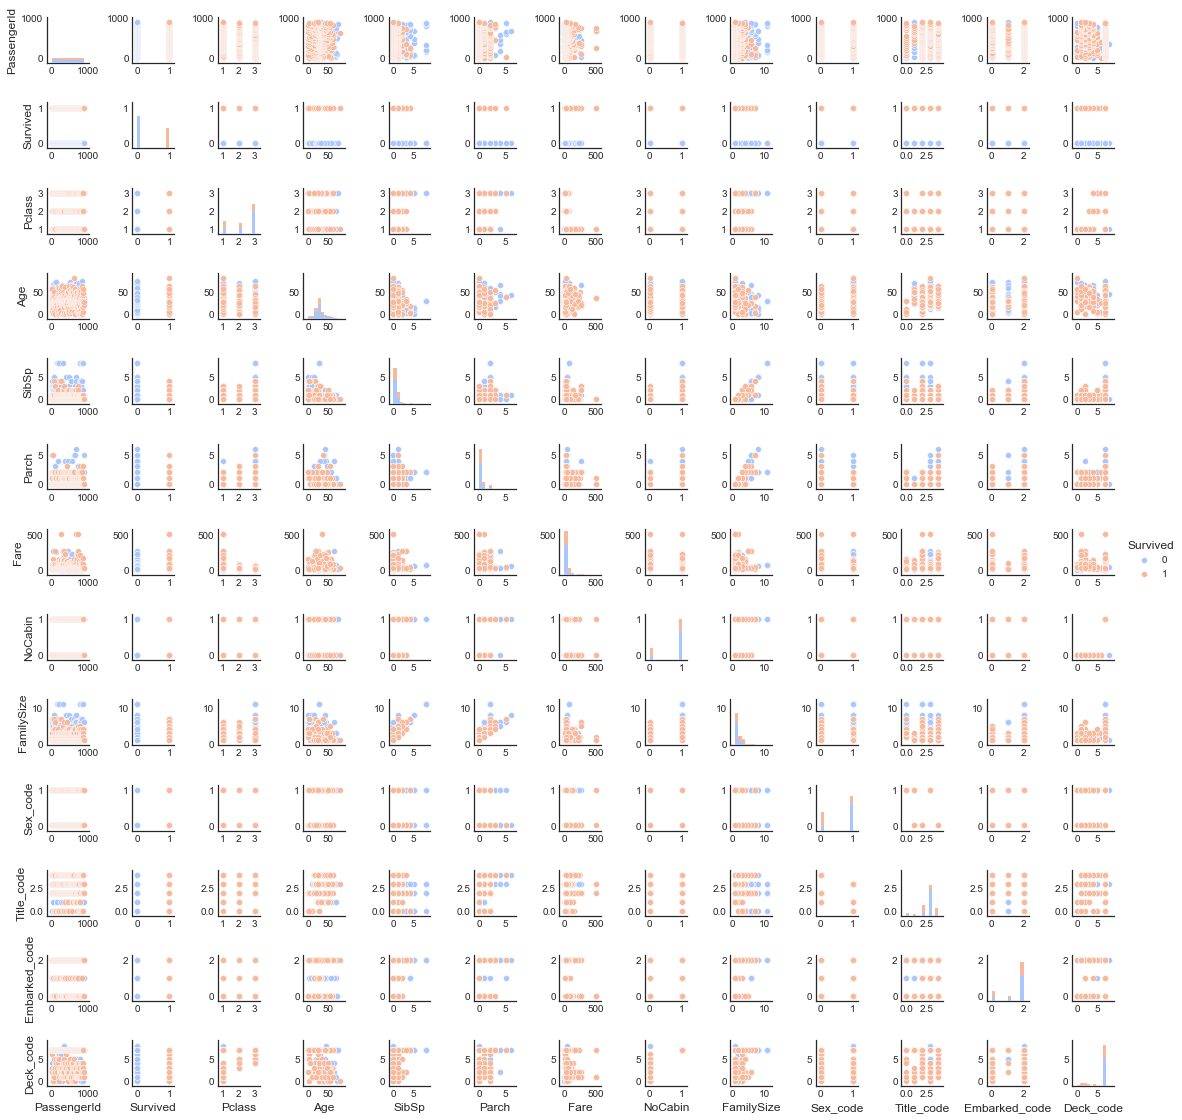

In [25]:
pp = sns.pairplot(data, hue = 'Survived', palette = 'coolwarm', size = 1.2, 
                  diag_kind='hist')

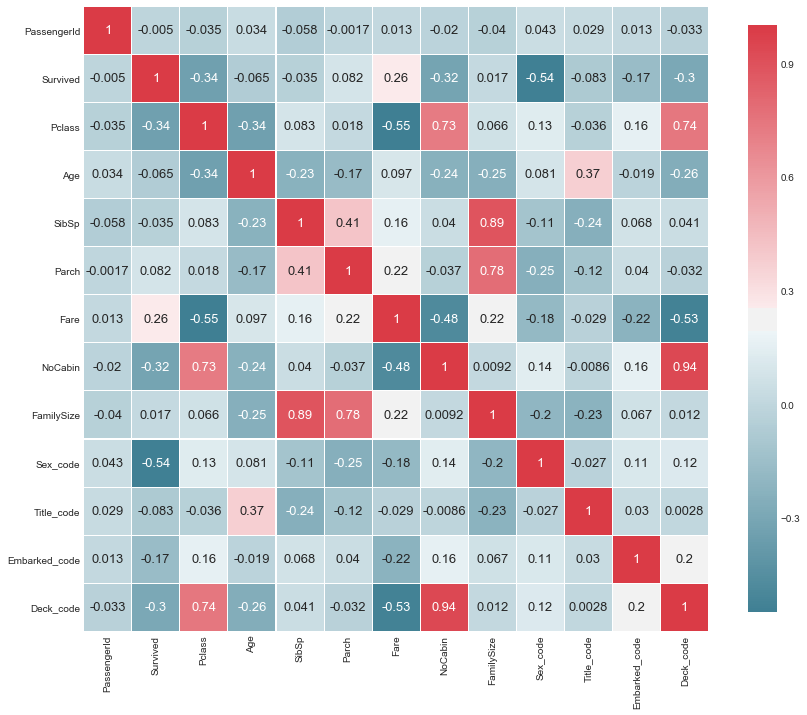

In [26]:
_, ax = plt.subplots(figsize=(14,12))
colormap = sns.diverging_palette(220,10,as_cmap=True)

_ = sns.heatmap(
    data.corr(),
    cmap = colormap,
    square = True,
    cbar_kws = {'shrink':.9},
    ax = ax,
    annot = True,
    linewidths = 0.1,
    vmax = 1.0,
    linecolor = 'white',
    annot_kws = {'fontsize':13}
)

The two large plots are much better for analysis as they are filled with information.

The scatter plots at the top shows histograms of data distribution on the diagonal. The pearson correlation coefficient which displays a measure of the correlation with the absolute number is shown at the bottom which also show if it is a positive or negative correlation by its sign.

From the figures, it can be interpreted that the survival rate is highly correlated with lass, Fare, Deck and Sex.

Other significant correlations are familysize from sibsp and parch, fare from pclass, title from age, deck from pclass. These are very promising correlations which can be digged deep to get more insight.

Text(0.5,1,'Sex vs Age')

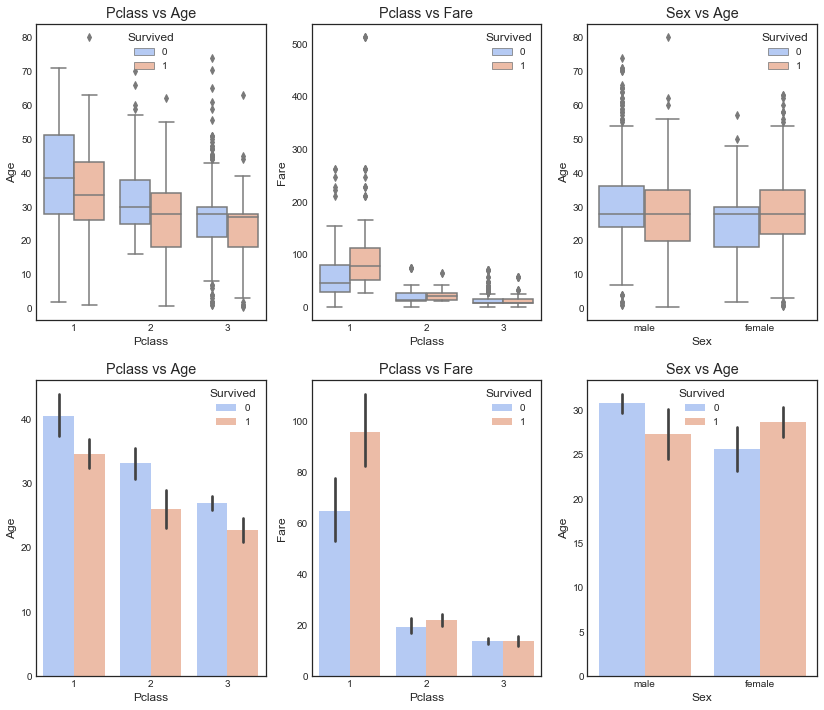

In [27]:
# plot fare vs class
fig, ax = plt.subplots(2,3,figsize=(14,12))

sns.boxplot(x='Pclass', y = 'Age', hue = 'Survived', data = data, ax = ax[0,0], palette = 'coolwarm')
ax[0,0].set_title('Pclass vs Age')
sns.boxplot(x='Pclass', y = 'Fare', hue = 'Survived', data = data, ax = ax[0,1], palette = 'coolwarm')
ax[0,1].set_title('Pclass vs Fare')
sns.boxplot(x='Sex', y = 'Age', hue = 'Survived', data = data, ax = ax[0,2], palette = 'coolwarm')
ax[0,2].set_title('Sex vs Age')

sns.barplot(x='Pclass', y = 'Age', hue = 'Survived', data = data, ax = ax[1,0], palette = 'coolwarm')
ax[1,0].set_title('Pclass vs Age')
sns.barplot(x='Pclass', y = 'Fare', hue = 'Survived', data = data, ax = ax[1,1], palette = 'coolwarm')
ax[1,1].set_title('Pclass vs Fare')
sns.barplot(x='Sex', y = 'Age', hue = 'Survived', data = data, ax = ax[1,2], palette = 'coolwarm')
ax[1,2].set_title('Sex vs Age')

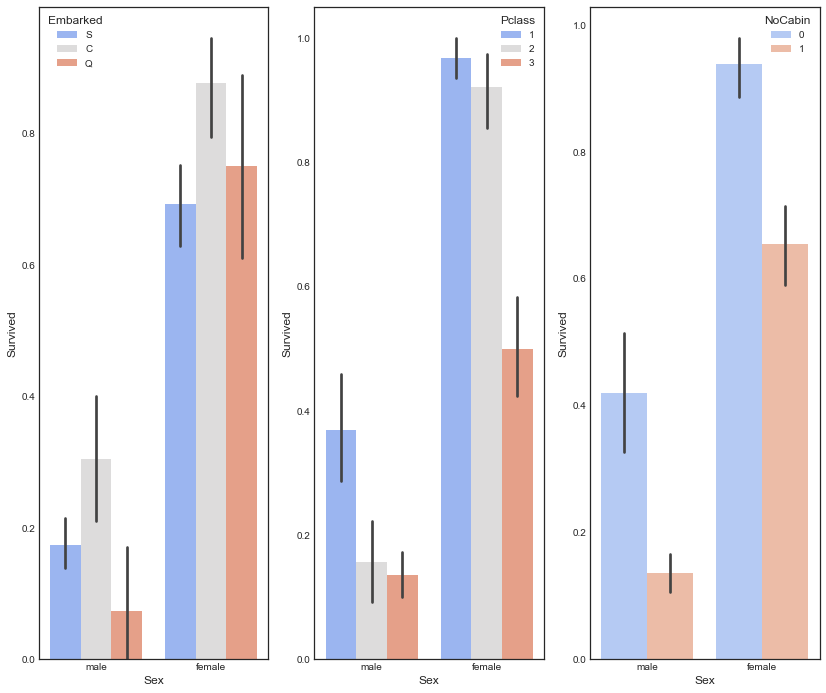

In [28]:
fig, ax = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=data, ax = ax[0], palette = 'coolwarm')
#qaxis[0,0].set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=data, ax = ax[1], palette = 'coolwarm')
#qaxis[0,1].set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'NoCabin', data=data, ax = ax[2], palette = 'coolwarm')
#qaxis[0,2].set_title('Sex vs IsAlone Survival Comparison')

This shows most variables are clinged with a lot of covarience which has the possibility to affect our prediction as the same error would appear in several features


Still, lets find out if there is any feature with low correlation to survival rate.

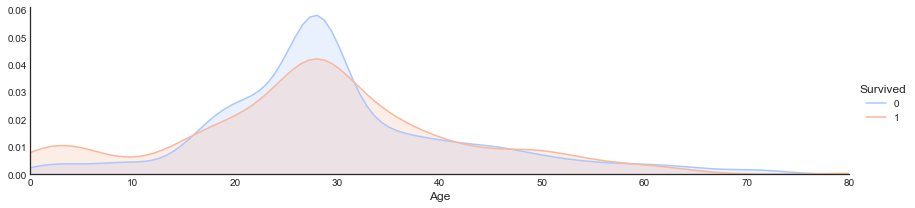

In [29]:
age = sns.FacetGrid(data = data, hue = 'Survived', palette ='coolwarm', aspect=4)
age.map(sns.kdeplot, 'Age', shade='True')
age.set(xlim=(0,data['Age'].max()))
age.add_legend()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
PassengerId      891 non-null int64
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Ticket           891 non-null object
Fare             891 non-null float64
Cabin            204 non-null object
Embarked         891 non-null object
Deck             891 non-null object
NoCabin          891 non-null int32
FamilySize       891 non-null int64
Title            891 non-null object
Sex_code         891 non-null int64
Title_code       891 non-null int64
Embarked_code    891 non-null int64
Deck_code        891 non-null int64
dtypes: float64(2), int32(1), int64(10), object(7)
memory usage: 135.8+ KB


Text(0.5,1,'PCA 2 vs PCA 3')

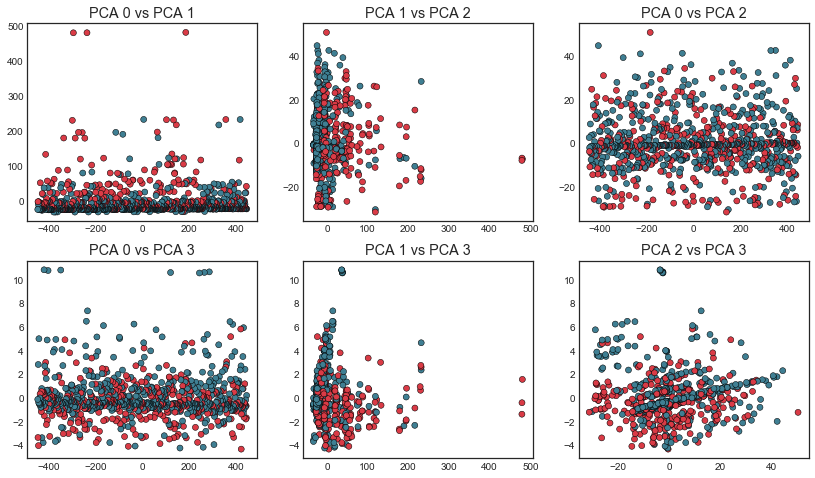

In [31]:
from sklearn import decomposition
colormap = sns.diverging_palette(220,10,as_cmap=True)

fig, ax = plt.subplots(2,3, figsize=(14, 8))
#plt.clf()
#plt.cla()
pca = decomposition.PCA(n_components=4)
pca.fit(data.select_dtypes(exclude=[object]))
X_PCA = pca.transform(data.select_dtypes(exclude=[object]))

ax[0,0].scatter(X_PCA[:, 0], X_PCA[:, 1], c=data['Survived'], edgecolor='k',cmap=plt.get_cmap(colormap))
ax[0,0].set_title('PCA 0 vs PCA 1')
ax[0,1].scatter(X_PCA[:, 1], X_PCA[:, 2], c=data['Survived'], edgecolor='k',cmap=plt.get_cmap(colormap))
ax[0,1].set_title('PCA 1 vs PCA 2')
ax[0,2].scatter(X_PCA[:, 0], X_PCA[:, 2], c=data['Survived'], edgecolor='k',cmap=plt.get_cmap(colormap))
ax[0,2].set_title('PCA 0 vs PCA 2')
ax[1,0].scatter(X_PCA[:, 0], X_PCA[:, 3], c=data['Survived'], edgecolor='k',cmap=plt.get_cmap(colormap))
ax[1,0].set_title('PCA 0 vs PCA 3')
ax[1,1].scatter(X_PCA[:, 1], X_PCA[:, 3], c=data['Survived'], edgecolor='k',cmap=plt.get_cmap(colormap))
ax[1,1].set_title('PCA 1 vs PCA 3')
ax[1,2].scatter(X_PCA[:, 2], X_PCA[:, 3], c=data['Survived'], edgecolor='k',cmap=plt.get_cmap(colormap))
ax[1,2].set_title('PCA 2 vs PCA 3')
#ax.set_legend()

The four principal components with largest covarience is shown from the above Principal component analysis (PCA) plots.

Since there are no discrening classs from these groups which can identified, its not possible to determine from there who does survive and who doesnt. 


That is why we need some machine learning algorithms to be runned on these to get clear picture which we will be doing in this assignment.

There will be more than 5 models which we are going to incorporate.

# Data Modeling



Lets take into consideration all the supervised classification algorithms to find out which would perform more to our satisfation.


The first step is remove columns and non-digit values along with saving target variables and features.



In [32]:
eval_titles = data.select_dtypes(exclude=[object]).columns
Target = eval_titles[1]
Features = eval_titles[2:]


The supervised classification problems are being solved by set of algorithms we going to consider below.

In [33]:
MLA = [
    # Neural Network
    neural_network.MLPClassifier(),
    
    # Ensemble Methods
    ensemble.RandomForestClassifier(),
    ensemble.ExtraTreesClassifier(),
    
    # Gaussian Process
    gaussian_process.GaussianProcessClassifier(),
    
    # Generalized Learning Models
    linear_model.LogisticRegressionCV(),
    linear_model.RidgeClassifierCV(),
    linear_model.Perceptron(),
    
    # Naive Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    # Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    # Support Vector Machines
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    
    # Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
]

The training is done as follows. The aim is to use as much data as possible. 


We chunk the data into 50 % training data, 40 % testing data and 10 % data 

This is done parallely 20 times which then done gives out the results to determine which algorithms is best in terms of accuracy and standard deviation.

In [34]:
# Split dataset into cross validation sets
cv_split = model_selection.ShuffleSplit(n_splits = 20,
                                        test_size =0.4,
                                        train_size=0.5,
                                        random_state=0                                    
                                       )

MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Train Accuracy Mean',
              'MLA Test Accuracy Mean', 'MLA Train Accuracy 3*STD',
               'MLA Test Accuracy 3*STD', 'MLA Time'
              ]
MLA_compare = pd.DataFrame(columns = MLA_columns)

# create table to compare MLA predictions
MLA_predict = pd.DataFrame()

#index through MLA and save performance to table
row_index = 0
for alg in MLA:
    
    # set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    # score model with cross validation
    cv_results = model_selection.cross_validate(alg, 
                                                data[Features], 
                                                data[Target], 
                                                cv = cv_split
                                               )
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy 3*STD'] = cv_results['train_score'].std()*3
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3
    
    alg.fit(data[Features], data[Target])
    MLA_predict[MLA_name] = alg.predict(data[Features])
    
    row_index+=1

Text(0,0.5,'Algorithm')

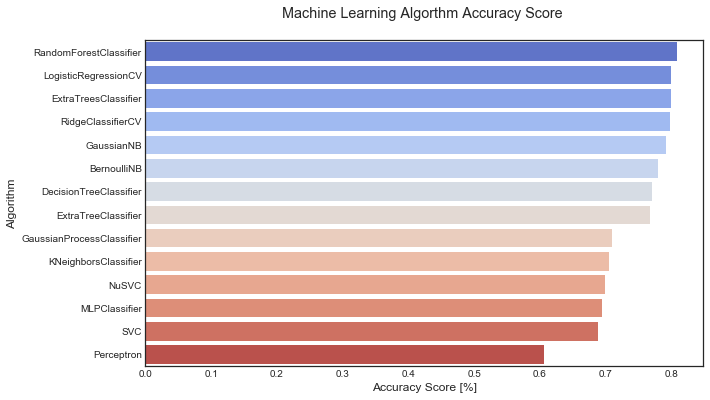

In [35]:
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)

plt.subplots(1,1, figsize=(10, 6))
sns.barplot(x = 'MLA Test Accuracy Mean', 
            y = 'MLA Name',
            data = MLA_compare, 
            palette = 'coolwarm'
           )
plt.title('Machine Learning Algorthm Accuracy Score \n')
plt.xlabel('Accuracy Score [%]')
plt.ylabel('Algorithm')

So the Random forest classifier has best mean test accuracy score which then we used to optimize.


This is done by mapping over parameter grid and selecting the best most accurate prediction.

In [36]:
alg = ensemble.RandomForestClassifier()
base_results = model_selection.cross_validate(alg, data[Features], data[Target], cv = cv_split)
alg.fit(data[Features],data[Target])

print('Original Random Forest Parameters: ', alg.get_params())
print('Original Random Forest Training w/bin score mean {:.2f} %'.format(base_results['train_score'].mean()*100))
print('Original Random Forest Test w/bin score mean {:.2f} %'.format(base_results['test_score'].mean()*100))
print('Original Random Forest Test w/bin 3*STD {:.2f} %'.format(base_results['train_score'].std()*100*3))

print('-'*25)

# tune hyper parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1,3,5,7,9],
              "min_samples_split": [2,3,4,5,6,7,8,9],
              "min_samples_leaf": [5,10,15,20,25],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]
}

tune_model = model_selection.GridSearchCV(alg, param_grid = param_grid, scoring = 'roc_auc', cv = cv_split)
tune_model.fit(data[Features], data[Target])

print('Optimized Random Forest Parameters: ', tune_model.best_params_)
print('Optimized Random Forest Training w/bin score mean: {:.2f} %'.format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print('Optimized Random Forest Test w/bin score mean: {:.2f} %'.format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('Optimized Random Forest Test w/bin score 3*STD: {:.2f} %'.format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100))

print('-'*25)

Original Random Forest Parameters:  {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': 1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Original Random Forest Training w/bin score mean 97.47 %
Original Random Forest Test w/bin score mean 80.48 %
Original Random Forest Test w/bin 3*STD 1.59 %
-------------------------
Optimized Random Forest Parameters:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 7}
Optimized Random Forest Training w/bin score mean: 94.20 %
Optimized Random Forest Test w/bin score mean: 86.92 %
Optimized Random Forest Test w/bin score 3*STD: 1.62 %
-------------------------


So with these optimization, lets try to predict once again which passangers will survive and which does not.

In [41]:
alg = ensemble.RandomForestClassifier(max_depth=None, min_samples_leaf = 10, n_estimators = 100, random_state = 0, 
                                      min_samples_split=2, criterion='entropy', bootstrap=True, max_features=9)
alg.fit(data[Features], data[Target])
data_val['Survived'] = alg.predict(data_val[Features])

In [42]:
submit = data_val[['PassengerId','Survived']]
submit.to_csv('C:/Users/work/Desktop/DA/submit.csv', index=False)

print(submit.sample(10))

     PassengerId  Survived
301         1193         0
184         1076         1
250         1142         1
267         1159         0
245         1137         0
351         1243         0
167         1059         0
279         1171         0
191         1083         0
291         1183         1


The submission scored 80.86% which is seems descent. Further score would significantly rise if more parameter tuning is performed articulately. The submission is at URL https://www.kaggle.com/radar4 which is under user name but display name as Prashant Wankhede.

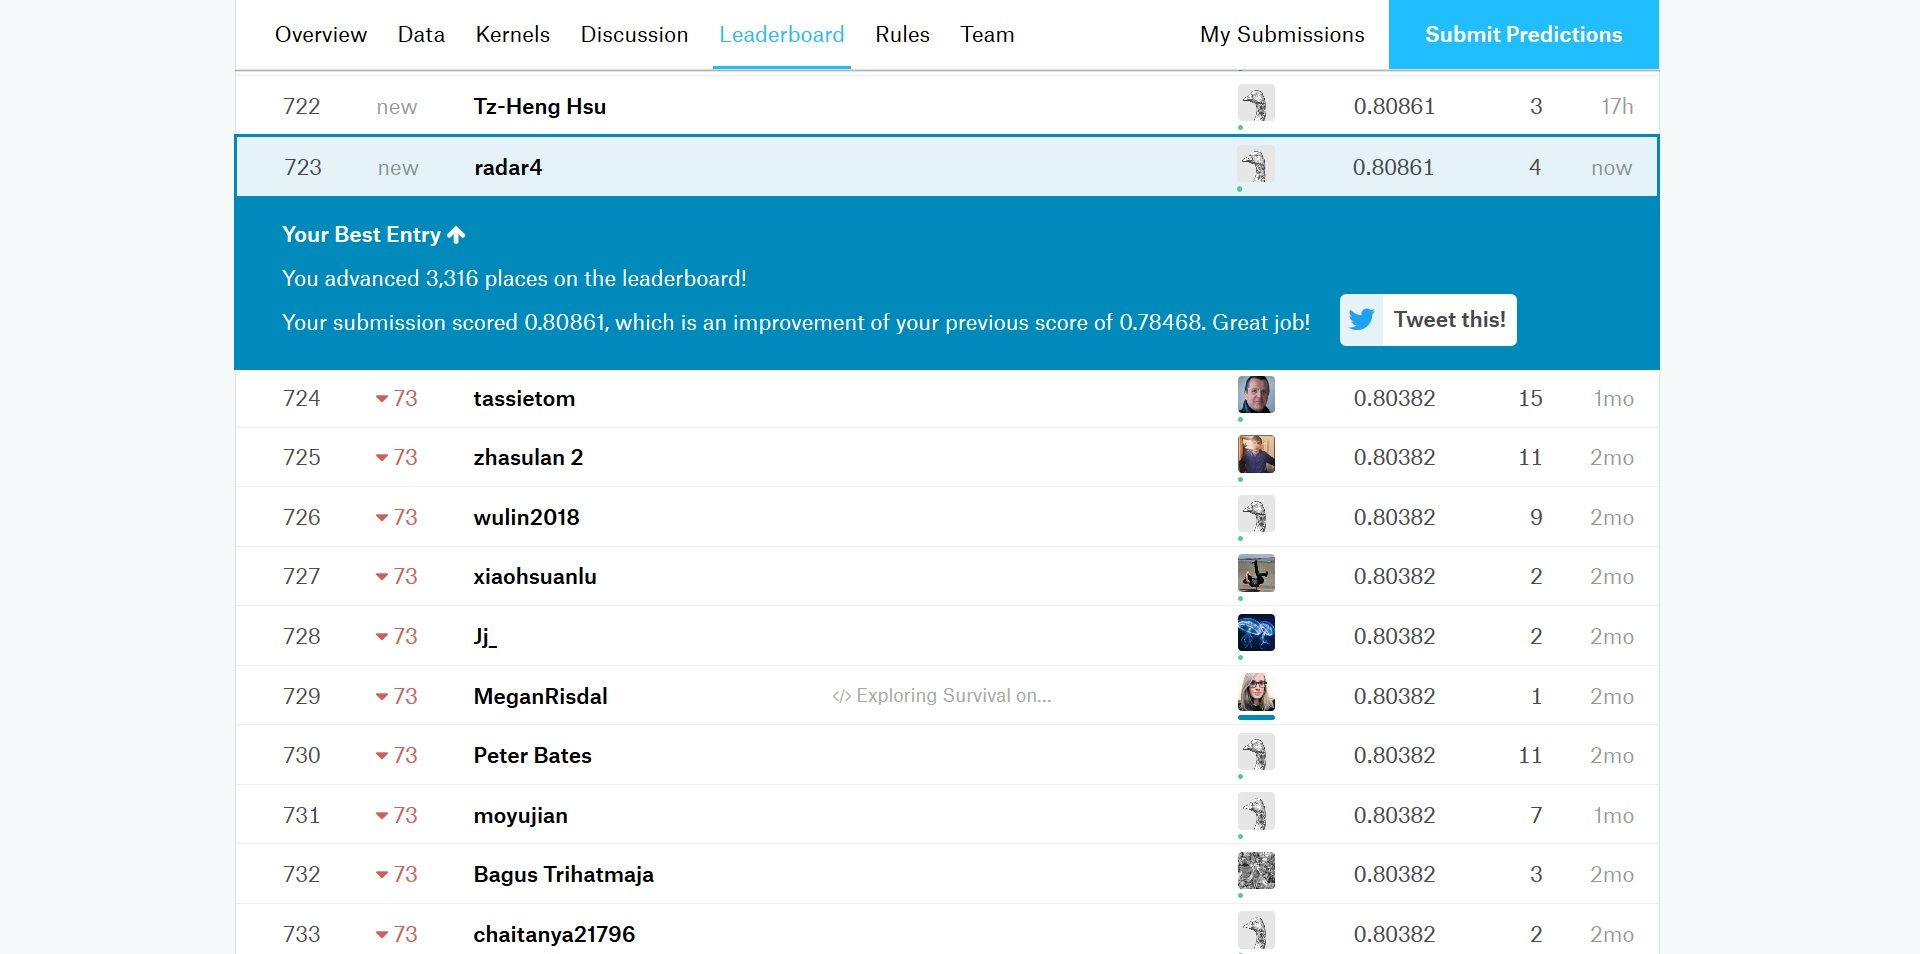

In [50]:
from IPython.display import Image
Image(filename= "C:\\Users\\work\\DEsktop\\DA\\screenshot.jpg")

Lets figure out the importance of the feature in overall dataset.

Text(0.5,0,'Feature Importance to Classification [%]')

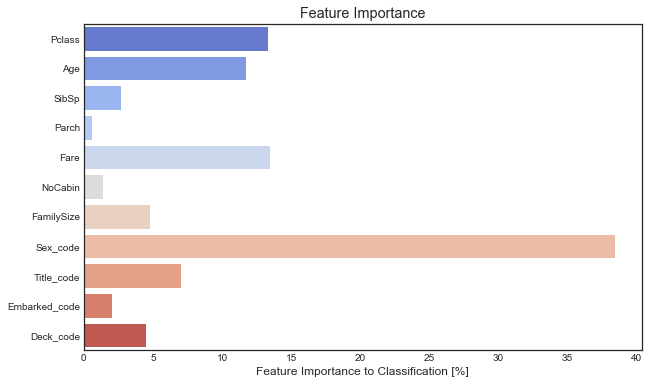

In [51]:
fig, ax = plt.subplots(1,1,figsize=(10,6))

sns.barplot(y = Features, x = alg.feature_importances_*100, palette = 'coolwarm')
ax.set_title('Feature Importance')
ax.set_xlabel('Feature Importance to Classification [%]')

## Adiitional Questions:
4. Answer the below questions about SettingWithCopyWarning in pandas (https://www.dataquest.io/blog/settingwithcopywarning)
   a. What is SettingWithCopyWarning? Please summarize.

###### This is the warning in PANDAS that occurs due to indexing of pandas data structure because of chaining. If you use more than one field in the index field, this would be characterized as chaining. Since, this is only the warning, you might be tempted to neglect this during initial setup of the program but one should be very careful to address this issue whenver it occurs.

   b. How did you make sure that the warning is not applicable in your cases?
###### We did not encounter this problem in our case and thus did not have an issue addressing it. We did not make use of index chaining in our program so this problem does not occur. Howver, using datafram copy command was used to make a deep copy of the values so no such warnings occurs during implementation.
   
   c. What can you do to avoid the warning according to the web? Please summarize.
###### SettingWithCopyWarning was created to flag potentially confusing "chained" assignments, such as the following:
###### df[df['A'] > 2]['B'] = new_value
###### This statement generates a warning which offers a suggestion to rewrite the assignment to 
###### df.loc[df['A'] > 2, 'B'] = new_value

###### Thus, to avoid this warning we much always use this syntax in the case of chained assignments.

   d. (extra points) What else can you do to avoid the warning? Please explain.

###### You can get rid of warning entirely by following command:
 ###### pd.options.mode.chained_assignment = None

###### To stop modifying copy of original DF, you can specify this:
###### df.is_copy = False

###### Use ‘copy’ :
###### df = data.loc[col.ID == 79]
###### to:
###### df = data.loc[col.ID == 79].copy()


